## Loading Libraries

In [37]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Load Data

First, let's just understand the available fields

In [2]:
df = pd.read_csv("/kaggle/input/geochemical-analyses-of-rock-samples-in-alaska/DoraBay_WholeRockGeochemistry_DataRelease.csv")
df.head()

,Field_ID,Lat_WGS84,Lon_WGS84,Rock_sample_desc,Location_desc,Al_pct_ICP-OES,Ca_pct_ICP-OES,Fe_pct_ICP-OES,K_pct_ICP-OES,Mg_pct_ICP-OES,...,K2O_pct_WDXRF,LOI_pct_WDXRF,MgO_pct_WDXRF,MnO_pct_WDXRF,Na2O_pct_WDXRF,P2O5_pct_WDXRF,SiO2_pct_WDXRF,SrO_pct_WDXRF,TiO2_pct_WDXRF,V2O5_pct_WDXRF
0,15DB-01,55.18513,132.29596,"Interior of 1-m-thick, medium-grained, felsic ...",West saddle DBIC,7.99,0.24,3.91,3.44,0.01,...,3.95,1.00,-0.01,0.16,7.30,0.01,66.1,-0.01,0.26,-0.01
1,15DB-02,55.18519,132.29579,"Typical coarse-grained, equigranular, leucocra...",West saddle DBIC,8.58,0.19,3.85,3.46,0.05,...,4.02,0.58,0.08,0.16,7.93,0.03,64.9,-0.01,0.26,-0.01
2,15DB-03,55.18610,132.29948,2- to 3-m-thick fine-grained felsic dike intru...,West saddle DBIC,7.60,0.21,4.02,3.28,0.02,...,3.80,0.25,0.02,0.13,7.54,0.01,66.7,-0.01,0.18,-0.01
3,15DB-04,55.18553,132.30026,Very-coarse-grained equigranular syenite.,West saddle DBIC,8.50,0.78,5.20,2.69,0.06,...,3.09,0.58,0.10,0.20,8.47,0.07,62.5,-0.01,0.33,-0.01
4,15DB-05,55.18997,132.29460,"Hornfelsed, fine-grained, bleached, gray-white...",West Ridge north of West saddle DBIC,6.41,0.10,2.34,3.99,0.05,...,4.62,0.34,0.07,0.05,4.80,0.02,74.6,-0.01,0.20,-0.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 80 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Field_ID          54 non-null     object 
 1   Lat_WGS84         54 non-null     float64
 2   Lon_WGS84         54 non-null     float64
 3   Rock_sample_desc  54 non-null     object 
 4   Location_desc     54 non-null     object 
 5   Al_pct_ICP-OES    54 non-null     float64
 6   Ca_pct_ICP-OES    54 non-null     float64
 7   Fe_pct_ICP-OES    54 non-null     float64
 8   K_pct_ICP-OES     54 non-null     float64
 9   Mg_pct_ICP-OES    54 non-null     float64
 10  P_pct_ICP-OES     54 non-null     float64
 11  S_pct_ICP-OES     54 non-null     float64
 12  Si_pct_ICP-OES    54 non-null     float64
 13  Ti_pct_ICP-OES    54 non-null     float64
 14  Ag_ppm_ICP-MS     54 non-null     int64  
 15  As_ppm_ICP-MS     54 non-null     int64  
 16  B_ppm_ICP-MS      54 non-null     int64  
 17 

In [4]:
# Shuffle data
df = df.sample(frac=1.0, random_state=42)

# Normalise data
data = df.drop(['Field_ID', 'Rock_sample_desc', 'Location_desc'], axis=1)
data = (data - data.mean()) / data.std()

In [5]:
# "Train", "Test" split with 50 datapoints :D 
n_train = (data.shape[0] * 8) // 10

train = data.iloc[:n_train, :]
test = data.iloc[n_train:, :]

print(train.shape, test.shape)

(43, 77) (11, 77)


### Data Visualisation

Show spatial distribution of samples

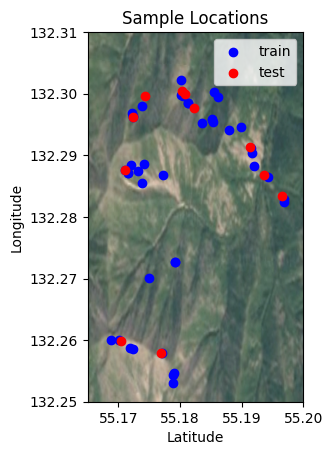

In [6]:
# Setup plot
plt.title("Sample Locations")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

# Show non-normalised lat/lon values for geospatial context
og_train = df.iloc[:n_train, :]
og_test = df.iloc[n_train:, :]

plt.scatter(og_train['Lat_WGS84'], og_train['Lon_WGS84'], c='b', label='train')
plt.scatter(og_test['Lat_WGS84'], og_test['Lon_WGS84'], c='r', label='test')

# Add region geography for context
img = plt.imread('/kaggle/input/geochemical-analyses-of-rock-samples-in-alaska/satellite.jpg')
plt.imshow(img, alpha=0.8, extent=[55.165, 55.2, 132.25, 132.31])

plt.legend()
plt.show()

Find a target variable with reasonably high variance to experiment with

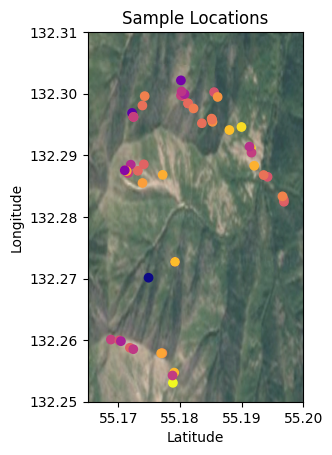

In [7]:
# Setup plot
plt.title("Sample Locations")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

# Show non-normalised lat/lon values for geospatial context
plt.scatter(df['Lat_WGS84'], df['Lon_WGS84'], c=data['Si_pct_ICP-OES'], cmap='plasma')

# Add region geography for context
img = plt.imread('/kaggle/input/geochemical-analyses-of-rock-samples-in-alaska/satellite.jpg')
plt.imshow(img, alpha=0.8, extent=[55.165, 55.2, 132.25, 132.31])

plt.show()

## Setup Kriging Model

Target variable is silicon concentration (parts per million). 
All points are assumed to have a different distance to each other due to irregular sampling.

In [32]:
def dist_matrix(points : np.ndarray) -> np.ndarray:
    """ 
    Computes distance between each pair of (lat,lon) points 
    
    Parameters
    ---------------
    points (matrix of (lat,lon) points; dim: n_ex x 2)
    
    Returns
    ---------------
    distance (matrix of Euclidean distances between points; dim: n_ex x n_ex)
    - Note: Haversine distance redundant here since order of points is identical
    """
        
    dist = (np.expand_dims(points, 1) - points) ** 2
    dist = np.sum(dist, axis=-1)
    return np.sqrt(dist)
    
    
dist_train = dist_matrix(df.iloc[:, 1:3].to_numpy())
print(dist_train.shape)

(54, 54)


In [33]:
def compute_variogram(target : np.ndarray, dist : np.ndarray) -> np.ndarray:
    """
    Computes semi-variogram of target variable (ex: ppm of silver)
    
    Parameters
    ----------------
    target (target variable measurements, dim: n_ex)
    dist (point distance matrix, dim: n_ex x n_ex)
    
    Returns
    ----------------
    variogram (sorted (dist, variance) pairs, dim: n_ex**2 x 2)
    """
    
    # Compute basic variogram
    dist = np.triu(dist)
    variance = 1/2 * (np.expand_dims(target, 1) - target) ** 2 
    variogram = np.concatenate(
        (np.expand_dims(dist, 0), np.expand_dims(variance, 0))
    )
    
    # Drop symmetric points (dist == 0), then sort
    variogram = variogram.reshape(2,-1).T
    variogram = variogram[~np.isclose(variogram[:,0], 0.0)]
    variogram = variogram[np.argsort(variogram[:,0])]
    
    # Bin points with similar distances and find mean variance
    n_bins = variogram.shape[0]//40
    bounds = np.linspace(0, variogram[-1,0], num=n_bins)[1:]
    bins = np.vstack((bounds, np.zeros((n_bins-1)))).T    
    
    for i in range(bins.shape[0]):
        # find points in current bin
        match = variogram[:,0] < bounds[i]
        first_non_match = np.argmin(match)
        
        # add those points' mean variance to bin
        mean_var = np.mean(variogram[:first_non_match, 1])
        bins[i,1] = mean_var
        variogram = variogram[first_non_match:]
    
    return bins
    
var_train = compute_variogram(data['Si_pct_ICP-OES'].to_numpy(), dist_train)
print(var_train.shape)

(34, 2)


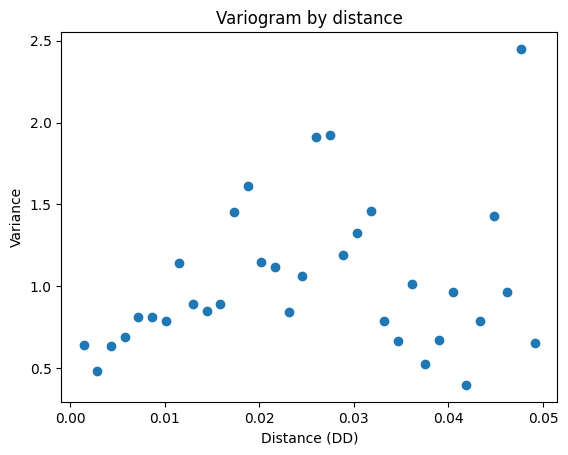

In [34]:
# Plot variogram by distance
plt.title("Variogram by distance")
plt.xlabel("Distance (DD)")
plt.ylabel("Variance")

plt.scatter(var_train[:,0], var_train[:,1])

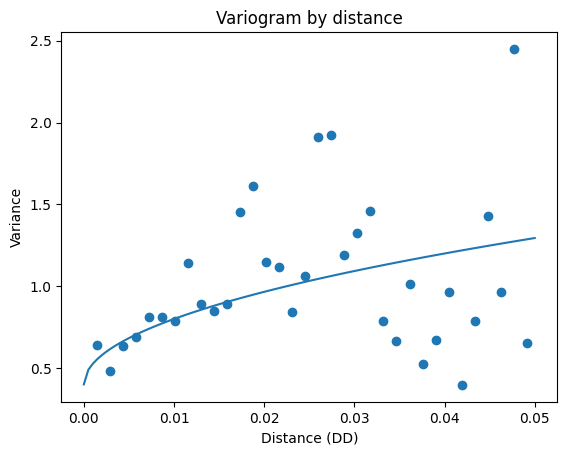

In [68]:
# Fit a spherical model to variogram
def spherical_model(dist : np.ndarray, sill : float, a : float) -> np.ndarray:
    """ Runs variance predictions for multiple distances """
    out = np.zeros_like(dist)
    out.fill(sill)
    
    mask = dist < a
    out[mask] *= (1 - 3 * dist[mask] / (2*a) + 1/2 * (dist[mask]/a) ** 3 )
    return out 

def sqrt_model(dist : np.ndarray, scale : float, offset : float) -> np.ndarray:
    """ Runs variance predictions, but with simple sqrt model """
    return scale * np.sqrt(dist) + offset

# Plot variogram by distance
plt.title("Variogram by distance")
plt.xlabel("Distance (DD)")
plt.ylabel("Variance")

plt.scatter(var_train[:,0], var_train[:,1])

# Overlay fitted spherical model
scale = 4.0
offset = 0.4
dist = np.linspace(0.0, 0.05, num=100)

plt.plot(dist, sqrt_model(dist, scale, offset))

### Predictions with Kriging Model